In [19]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=124255 sha256=99baa21e9b214635adcaac27c8930c47c2240f730dd3997d770d1260f34ec2e2
  Stored in directory: /tmp/pip-ephem-wheel-cache-stioz4u0/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [1]:
nb_example = 1

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
import straph.betweenness.volumes as vol
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "edge"+str(nb_example)+"_nodes.sg",
                      path_links=path_directory + "edge"+ str(nb_example)+ "_links.sg")
S.describe()

Nb of Nodes :  4
Nb of segmented nodes :  4.0
Nb of links :  3
Nb of segmented links :  3.0
Nb of event times :  5


In [3]:
bt.to_undirected(S)

<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


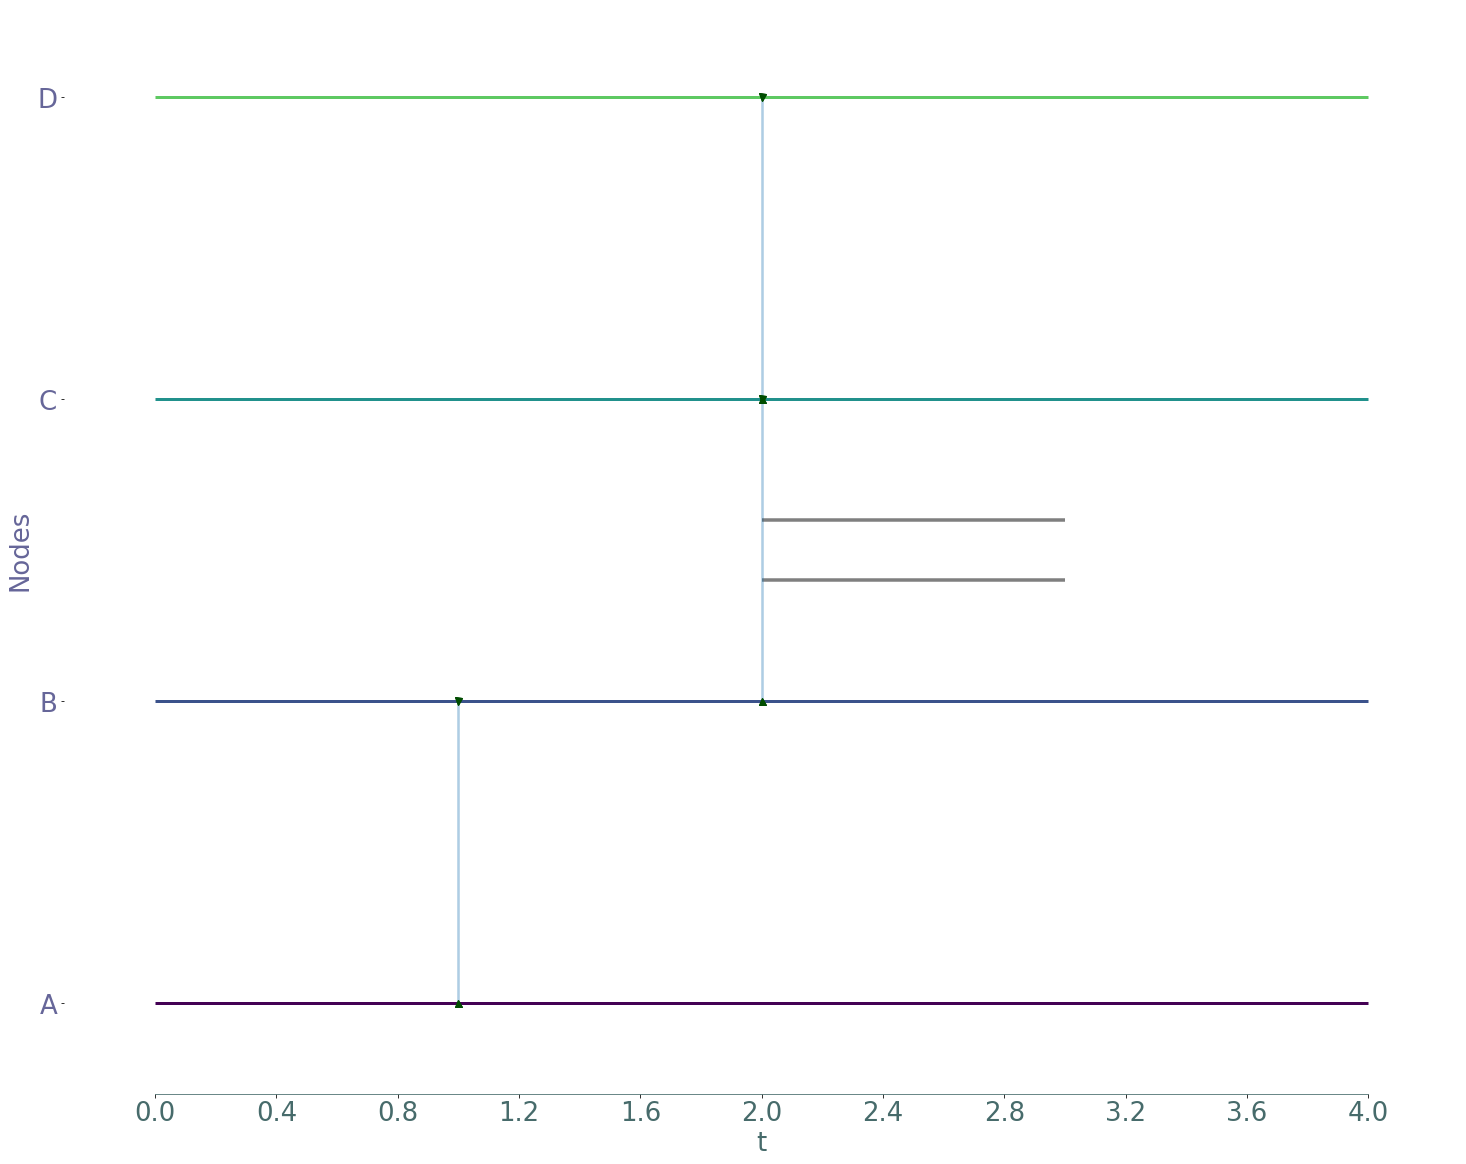

In [4]:
S.plot()

In [5]:
#for i in range(0,2*int(max(list(S.event_times())))):
#    S.add_point(i/2)
#S.sg_to_streamfig("stream_example","eps")
nouveau = S.fragmented_stream_graph()

In [6]:
#nouveau.plot()
#plt.savefig("link_s_con.png",dpi=300,bbox_inches ='tight' )

In [7]:
events, events_reverse = bt.events_dic(nouveau)

In [8]:
link_ind = bt.link_index(nouveau)
neighbors, neighbors_inv = bt.neighbors_direct(nouveau)
unt = bt.until(nouveau, events, events_reverse)

In [9]:
nouveau.link_presence

[[1.0, 1.0], [2.0, 3.0], [2.0, 2.0], [1.0, 1.0], [2.0, 3.0], [2.0, 2.0]]

In [10]:
nouveau.links

[(0, 1), (1, 2), (2, 3), (1, 0), (2, 1), (3, 2)]

In [11]:
node = 0

In [12]:
pre, cur_best = bt.dijkstra_directed_edge(nouveau, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt)

laaaaaaaa
avant debut crubest [{0.0: {0: (-inf, inf), 1: (-inf, inf)}, 1.0: {0: (-inf, inf), 1: (1.0, 0)}, 2.0: {0: (-inf, inf), 1: (-inf, inf)}, 3.0: {0: (-inf, inf), 1: (-inf, inf)}, 4.0: {0: (-inf, inf), 1: (-inf, inf)}}, {0.0: {0: (-inf, inf), 1: (-inf, inf)}, 1.0: {0: (-inf, inf), 1: (-inf, inf)}, 2.0: {0: (-inf, inf), 1: (-inf, inf)}, 3.0: {0: (-inf, inf), 1: (-inf, inf)}, 4.0: {0: (-inf, inf), 1: (-inf, inf)}}, {0.0: {0: (-inf, inf), 1: (-inf, inf)}, 1.0: {0: (-inf, inf), 1: (-inf, inf)}, 2.0: {0: (-inf, inf), 1: (-inf, inf)}, 3.0: {0: (-inf, inf), 1: (-inf, inf)}, 4.0: {0: (-inf, inf), 1: (-inf, inf)}}, {0.0: {0: (-inf, inf), 1: (-inf, inf)}, 1.0: {0: (-inf, inf), 1: (-inf, inf)}, 2.0: {0: (-inf, inf), 1: (-inf, inf)}, 3.0: {0: (-inf, inf), 1: (-inf, inf)}, 4.0: {0: (-inf, inf), 1: (-inf, inf)}}] pre [{0.0: {0: {}, 1: {}}, 1.0: {0: {}, 1: {(0, 0): (-1, -1)}}, 2.0: {0: {}, 1: {}}, 3.0: {0: {}, 1: {}}, 4.0: {0: {}, 1: {}}}, {0.0: {0: {}, 1: {}}, 1.0: {0: {}, 1: {}}, 2.0: {0: {}, 

In [18]:
pre[2]

{0.0: {0: {}, 1: {}},
 1.0: {0: {}, 1: {}},
 2.0: {0: {}, 1: {(1, 1.0, 1): (2.0, 2.0)}},
 3.0: {0: {(1, 1.0, 1): (2.0, 3.0)}, 1: {(1, 1.0, 1): (3.0, 3.0)}},
 4.0: {0: {}, 1: {}}}

In [13]:
cur_b_arr = bt. cur_best_to_array_edge(nouveau, cur_best, events, events_reverse)

In [14]:
pre2, cur_best2 = bt.dijkstra_directed(nouveau, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt)


In [16]:
lat = bt.latencies(nouveau, cur_b_arr, events, events_reverse)
lat_triplet, lat_rev_triplet = bt.latencies_without_0_and_rev(nouveau, lat, events)

In [17]:
lat_triplet[1]

[[1.0, 1.0, 1]]

In [13]:
G = bt.predecessor_graph(nouveau, pre,node)
GG = bt.graph_to_ordered(G, events, events_reverse)
Gp = bt.instant_graphs(G)
GT = bt.interval_graph(Gp)

In [14]:
edge = bt.edges(nouveau)

In [15]:
before, after = bt.volume_instantenuous(nouveau, G, events, events_reverse, edge)
mx = bt.max_volume_superposition(GT)
print(mx)

1


In [16]:
sigma = bt.volume_metapaths_at_t(G, node, cur_best, mx)
f_edge = bt.dictionary_first_edge(G,  cur_best)
sigma_r = bt.optimal_with_resting_con(nouveau, node, f_edge, events, G, sigma, cur_best, unt)

In [17]:
sigma_r

{(0, 0.0): vol(1,0),
 (0, 1.0): vol(1,0),
 (0, 2.0): vol(1,0),
 (0, 3.0): vol(1,0),
 (0, 4.0): vol(1,0),
 (1, 0.0): vol(0,0),
 (1, 1.0): vol(1,0),
 (1, 2.0): vol(1,0),
 (1, 3.0): vol(1,0),
 (1, 4.0): vol(1,0),
 (2, 0.0): vol(0,0),
 (2, 1.0): vol(0,0),
 (2, 2.0): vol(1,0),
 (2, 3.0): vol(1.0,1),
 (2, 4.0): vol(1.0,1),
 (3, 0.0): vol(0,0),
 (3, 1.0): vol(0,0),
 (3, 2.0): vol(1,0),
 (3, 3.0): vol(1,0),
 (3, 4.0): vol(1,0)}

In [18]:
contri, prev_next = bt.contribution_each_latency_con(nouveau, lat_rev_triplet,events[0],events[len(events)-1], before, after)
latence_arrival = {v : { y: [x,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }
latence_depar = {v : { x : [y,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }

In [19]:
preced = bt.preced_node(S, G,events,events_reverse)

In [20]:
preced

{0: {1.0: 1.0},
 1: {1.0: 1.0},
 2: {2.0: 2.0, 3.0: 3.0, 4.0: 3.0},
 3: {2.0: 2.0}}

In [21]:
deltasvvt = bt.dictionary_svvt(G, node, latence_arrival, contri, prev_next, sigma_r,  latence_depar)

In [22]:
deltasvvt

{(0, 1.0): vol(0,0),
 (1, 1.0): vol(3.0,0),
 (2, 2.0): vol(2.0,0),
 (2, 3.0): vol(0,0),
 (3, 2.0): vol(2.0,0)}

In [29]:
contribution, edge_contri = bt.general_contribution_from_node(nouveau, G, node, GG, sigma_r, deltasvvt, events, events_reverse, pre, GT, unt, preced, edge = True)

In [30]:
edge_contri

{(1, 2, 3.0): vol(0,0),
 (2, 3, 2.0): vol(2.0,0),
 (1, 2, 2.0): vol(4.0,0),
 (0, 1, 1.0): vol(7.0,0)}